<a href="https://colab.research.google.com/github/mattbal/allumer/blob/master/Copy_of_SkinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Tensorflow

In [0]:
!pip install tensorflow-gpu==2.0.0  #install tensorflow
import tensorflow as tf             #imported as tf
tf.__version__                      #check for version 2.0.0

'2.0.0'

Import Keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Import Data Management

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import cv2

Install drive data management

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate Google Account

```
# This is formatted as code
```



In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Get Zip

In [0]:
fid = drive.ListFile({'q':"title='skin-cancer-malignant-vs-benign.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id':fid})
f.GetContentFile('skin-cancer-malignant-vs-benign.zip')

NameError: ignored

In [0]:
f.keys()

NameError: ignored

In [0]:
!unzip skin-cancer-malignant-vs-benign.zip #Unzip zip into content

In [0]:
train_dir = 'train'
validation_dir = 'test'

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

img_input = layers.Input(shape=(150,150,3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

#Second Layer
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third Layer
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten
x = layers.Flatten()(x)

# 
x = layers.Dense(512, activation='relu')(x)

# Output layer
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0     

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 15s - loss: 0.6247 - acc: 0.7170 - val_loss: 0.4451 - val_acc: 0.7760
Epoch 2/15
100/100 - 9s - loss: 0.4835 - acc: 0.7663 - val_loss: 0.3821 - val_acc: 0.8320
Epoch 3/15
100/100 - 8s - loss: 0.4310 - acc: 0.7800 - val_loss: 0.4617 - val_acc: 0.7590
Epoch 4/15
100/100 - 9s - loss: 0.4288 - acc: 0.7942 - val_loss: 0.3847 - val_acc: 0.7980
Epoch 5/15
100/100 - 8s - loss: 0.3830 - acc: 0.8052 - val_loss: 0.3565 - val_acc: 0.8410
Epoch 6/15
100/100 - 8s - loss: 0.3793 - acc: 0.8162 - val_loss: 0.3996 - val_acc: 0.8090
Epoch 7/15
100/100 - 8s - loss: 0.3567 - acc: 0.8353 - val_loss: 0.3959 - val_acc: 0.8050
Epoch 8/15
100/100 - 8s - loss: 0.3493 - acc: 0.8395 - val_loss: 0.3713 - val_acc: 0.8240
Epoch 9/15
100/100 - 8s - loss: 0.3265 - acc: 0.8498 - val_loss: 0.4159 - val_acc: 0.8000
Epoch 10/15
100/100 - 8s - loss: 0.3134 - acc: 0.8678 - val_loss: 0.5148 - val_acc: 0.7330
Epoch 11/15
100/100 - 8s - loss: 0.3084 - acc: 0.8553 - val_loss: 0.3787 - val_acc: 0.8270
Epoch 1

Text(0.5, 1.0, 'Training and validation loss')

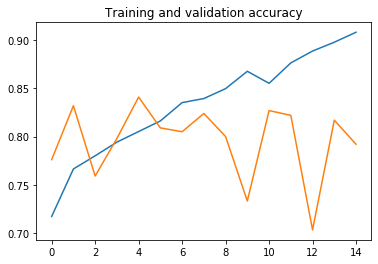

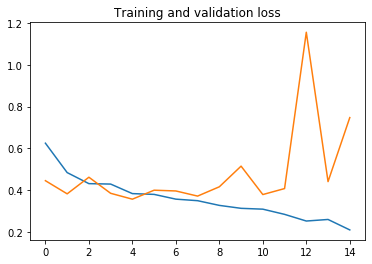

In [0]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Create Model

In [0]:
model = Sequential([
Conv2D(16, 2, padding='same',activation='relu', input_shape=(244, 244, 3)),    #2 -> 3
MaxPooling2D(),
Dropout(0.2),
Conv2D(32,2,padding='same',activation='relu'),                                 #2 -> 3
MaxPooling2D(),
Conv2D(64,2, padding='same',activation='relu'),                                #2 -> 3
MaxPooling2D(),
Dropout(0.2),
Flatten(),
Dense(512, activation='relu'),
Dense(2, activation='softmax')  ##dense 3?
])

Compile Model

In [0]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 244, 244, 16)      208       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 122, 122, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 122, 122, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 122, 122, 32)      2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)       

Training

In [0]:
#Set batch and epoch time
batch_size = 128
epochs = 10
#Get number of images in each category and assign to variables
size_train_b = len(os.listdir('train/benign'))
size_train_m = len(os.listdir('train/malignant'))
size_test_b = len(os.listdir('test/benign'))
size_test_m = len(os.listdir('test/malignant'))
size_train = size_train_b + size_train_m
size_test = size_test_b + size_test_m
print("Training benign: ", size_train_b)
print("Training malignant: ", size_train_m)
print("Testing benign: ", size_test_b)
print("Training malignant: ", size_test_m)
print("\nTotal Training: ", size_train)
print("Total Testing: ", size_test)


Training benign:  1440
Training malignant:  1197
Testing benign:  360
Training malignant:  300

Total Training:  2637
Total Testing:  660


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(244, 244),  # all images will be resized to 244x244
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(244, 244),
        batch_size=batch_size,
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [0]:
from keras.utils import to_categorical
history = model.fit_generator(
    train_generator,#train_data_gen
    steps_per_epoch=size_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=size_test // batch_size#,
    #callbacks = [tf.keras.callbacks.EarlyStopping(
        #moniter='val_loss',
        #min_delta=0.01,
        #patience=4
    #)]
)

Epoch 1/10


ValueError: ignored

In [0]:
gen = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [0]:
h = model.fit()

NameError: ignored